# **4장. 신경망 적용해보기**
# 다중 분류 : MNist와 Fashion-MNist 데이터셋 활용

MNIST 데이터셋 예제) 데이터 다운받고 모델 학습시키기

받아온 학습 데이터
(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]

받아온 테스트 데이터
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]



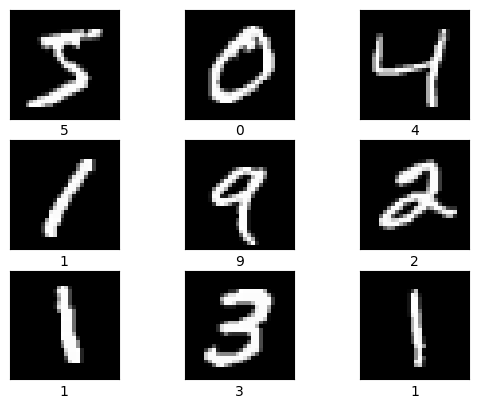


훈련 데이터, 검증 데이터 나누기
훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)

전처리 후 x_train.shape : (42000, 784)
전처리 후 x_val.shape : (18000, 784)
전처리 후 x_test.shape : (10000, 784)

범주형 변환 전 y_train : [2 7 6 ... 3 4 5]
범주형으로 변환한 y_train :
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Epoch 1/30
329/329 [==============================] - 4s 9ms/step - loss: 0.8769 - acc: 0.7227 - val_loss: 0.2828 - val_acc: 0.9217
Epoch 2/30
329/329 [==============================] - 2s 7ms/step - loss: 0.4357 - acc: 0.8719 - val_loss: 0.2040 - val_acc: 0.9396
Epoch 3/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3375 - acc: 0.9037 - val_loss: 0.1705 - val_acc: 0.9507
Epoch 4/30
329/329 [==============================] - 2s 7ms/step - loss: 0.2836 - acc: 0.9206 - val_loss: 0.1534 - val_acc: 0.9537
Epoch 5/30
329/329 [==============================] - 3s 10ms/

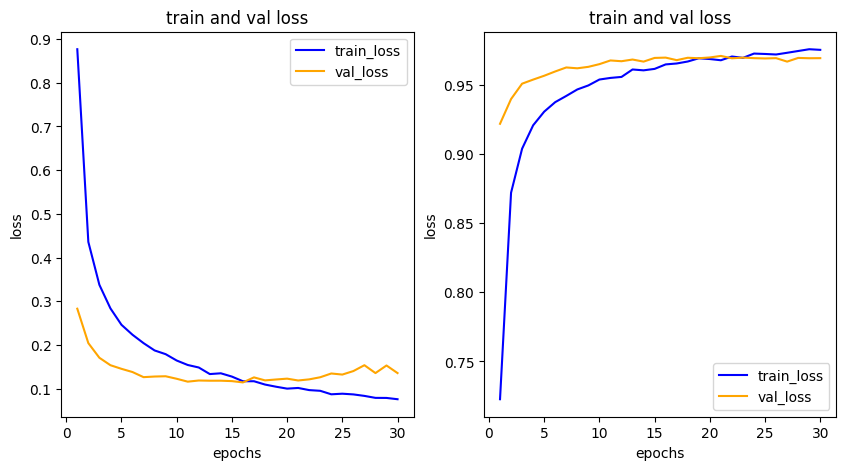


313/313 [==============================] - 1s 3ms/step - loss: 0.1260 - acc: 0.9726



In [ ]:
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
import keras

####################### 모델에 사용할 데이터 전처리 및 정규화? 과정 #######################
## 텐서플로우 저장소에서 데이터 다운받기
## MNIST 데이터셋은 6만개 학습 데이터, 1만개의 테스트 데이터가 각각 (28, 28)의 형태의 숫자 이미지로 구성되어 있음
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
# 학습 데이터 확인
print("받아온 학습 데이터")
print(x_train.shape, y_train.shape)
print(y_train)
print()
# 테스트 데이터 확인
print("받아온 테스트 데이터")
print(x_test.shape, y_test.shape)
print(y_test)
print()

## MNIST 데이터셋 이미지 확인해보기
for i in range(9):
  plt.subplot(3,3,i+1)  #3x3 격자의 서브플롯을 생성
  plt.xticks([]) # X축 눈금 제거
  plt.yticks([]) # Y축 눈금 제거
  plt.imshow(x_train[i], cmap='gray')
  plt.xlabel(y_train[i])
plt.show()
print()

## 모델 검증을 위해 검증 데이터셋 만들기
## 여기서는 train-set, test-set을 7:3으로 나눔, 보통은 0.2? 0.25? 비율로 나눔
## train_test_split() 함수의 test_size : 테스트 데이터셋 비율, random_state : 재생산성
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)
print("훈련 데이터, 검증 데이터 나누기")
print(f"훈련 데이터 {x_train.shape} 레이블 {y_train.shape}")
print(f"검증 데이터 {x_val.shape} 레이블 {y_val.shape}")
print()

## 학습을 위해 전처리 수행
## 255로 나눠주어 0~1 사이로 스케일 조정
## !신경망은 스케일(scale)에 매우 민감!
## Dense 층 사용을 위해 784차원의 1차원 배열로 변환
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]
# 모델의 입력으로 사용하기 위한 전처리 과정
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255
print(f"전처리 후 x_train.shape : {x_train.shape}")
print(f"전처리 후 x_val.shape : {x_val.shape}")
print(f"전처리 후 x_test.shape : {x_test.shape}")
print()

## 모델 마지막 층에서 softmax 함수 사용하므로 범주형 레이블로 전환
## to_categorical() 함수 : 원핫인코딩을 수행하는 기능을 제공하는 함수
print(f"범주형 변환 전 y_train : {y_train}")
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
print(f"범주형으로 변환한 y_train :\n{y_train}")
print()

####################### 모델 구성하기 #######################
## 모델 구성
model = Sequential()   # 모델 깡통 생성, add로 모델 정의 넣기
# 주의: 입력 데이터 형태 꼭 명시하기!
# 784차원 데이터 입력 받고, 64개 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = "relu", input_shape = (784,)))
model.add(Dense(32, activation = "relu")) # 32개의 출력을 가지는 Dense층
########### 중요! ###########
model.add(Dropout(0.5)) # 과대적합 해결을 위한 드롭아웃 층 적용. 신경망 일부를 사용하지 않는 방법.
model.add(Flatten()) # Flatten 층으로 평탄화 작업 진행. 보통 나는 마지막 출력층 전에 했었음.
#############################
model.add(Dense(10, activation = "softmax")) # 10개의 출력을 가지는 신경망
# 모델 구성 마지막 단계 : 손실 함수, 옵티마이저, 평가지표 설정
model.compile(optimizer="adam",   # 옵티마이저 : Adam
              # 손실함수 : categorical_crossentropy -> 다중 분류에 주로 사용
              loss = "categorical_crossentropy",  # 서로의 결과값이 틀린 경우 무한대로 발산, 동일한 경우 0으로 수렴
              # 모니터링 할 평가지표 : acc
              metrics = ["acc"])

####################### 모델 학습시키기 #######################
## fit() 함수는 History 클래스를 반환하는데, 여기엔 훈련에서 계산한 손실, 정확도가 저장된다.
# validation_data에 검증 데이터셋 전달, 128 배치크기 사용, 전체 데이터 30회 반복
history = model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))
print()

####################### 결과 확인하기, 그래프로 #######################
# 그래프 그리기
his_dict = history.history

loss = his_dict["loss"]
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = "blue", label = "train_loss")
ax1.plot(epochs, val_loss, color = "orange", label = "val_loss")
ax1.set_title("train and val loss")
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.legend()

acc = his_dict["acc"]
val_acc = his_dict["val_acc"]

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = "blue", label = "train_loss")
ax2.plot(epochs, val_acc, color = "orange", label = "val_loss")
ax2.set_title("train and val loss")
ax2.set_xlabel("epochs")
ax2.set_ylabel("loss")
ax2.legend()

plt.show()
print()

####################### 모델 평가 및 예측 실행 #######################
## 모델 평가
model.evaluate(x_test, y_test)
print()

## 학습된 모델로 값 예측
# results = model.predict(x_test)
# print(results.shape)
# np.set_printoptions(precision = 7)  # numpy 소수점 제한
# print(f"각 클래스에 속할 확률 : \n{results [0]}")

Fashion-MNIST 데이터셋 예제) 데이터 다운받고 모델 학습시키기

(60000, 28, 28) (10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   

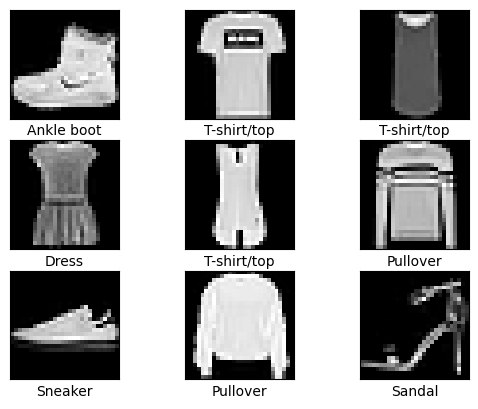


첫번째 모델 학습 과정
Epoch 1/30
329/329 [==============================] - 5s 10ms/step - loss: 0.8081 - acc: 0.7176 - val_loss: 0.4670 - val_acc: 0.8399
Epoch 2/30
329/329 [==============================] - 3s 9ms/step - loss: 0.4924 - acc: 0.8237 - val_loss: 0.4143 - val_acc: 0.8551
Epoch 3/30
329/329 [==============================] - 4s 12ms/step - loss: 0.4522 - acc: 0.8395 - val_loss: 0.3858 - val_acc: 0.8656
Epoch 4/30
329/329 [==============================] - 3s 9ms/step - loss: 0.4308 - acc: 0.8461 - val_loss: 0.3763 - val_acc: 0.8696
Epoch 5/30
329/329 [==============================] - 3s 9ms/step - loss: 0.4155 - acc: 0.8515 - val_loss: 0.3670 - val_acc: 0.8712
Epoch 6/30
329/329 [==============================] - 3s 9ms/step - loss: 0.4050 - acc: 0.8537 - val_loss: 0.3574 - val_acc: 0.8766
Epoch 7/30
329/329 [==============================] - 4s 11ms/step - loss: 0.3946 - acc: 0.8574 - val_loss: 0.3497 - val_acc: 0.8781
Epoch 8/30
329/329 [==============================] - 3s 9m

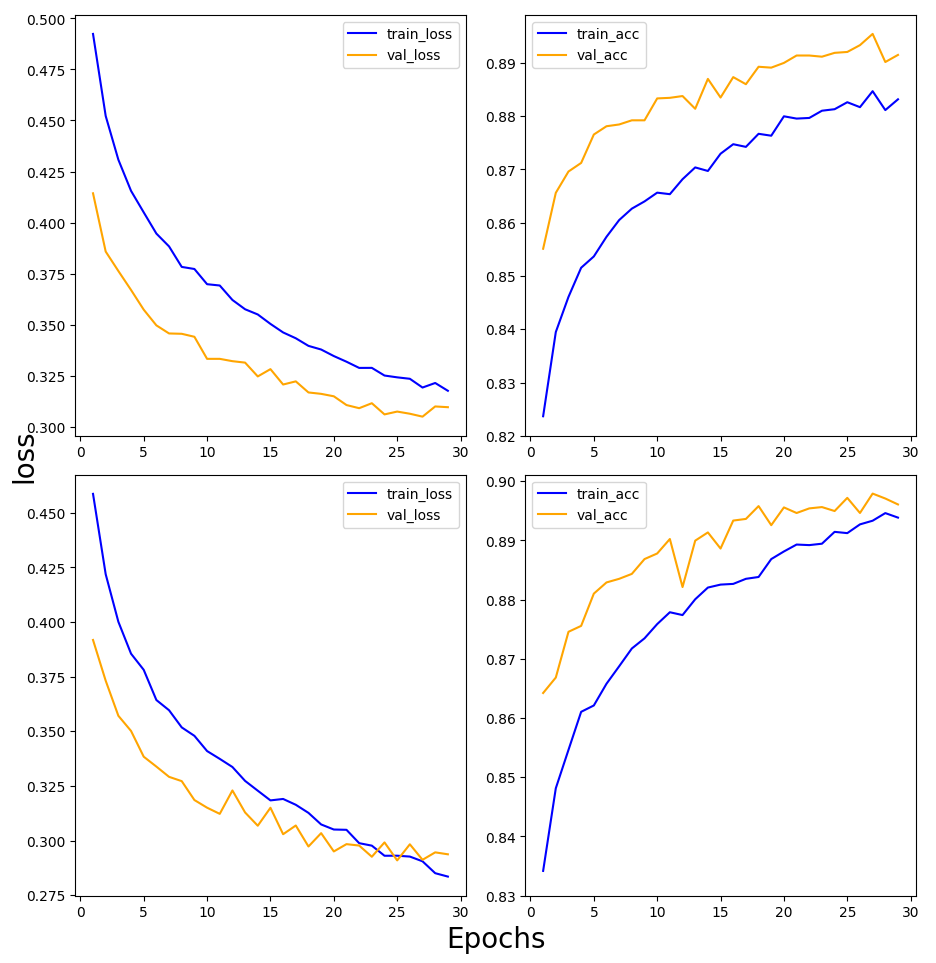


첫번째 모델:
313/313 [==============================] - 1s 2ms/step - loss: 0.3340 - acc: 0.8786

두번째 모델:
313/313 [==============================] - 1s 3ms/step - loss: 0.3179 - acc: 0.8869


[0.3178836703300476, 0.886900007724762]

In [ ]:
from keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

## 사전에 손실값 그리는 함수 정의해두기
def draw_loss_acc(history_1, history_2, epochs):
  his_dict_1 = history_1.history
  his_dict_2 = history_2.history
  keys = list(his_dict_1.keys())
  epochs = range(1, epochs)
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1,1,1)
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
  for i in range(len(his_dict_1)):
    temp_ax = fig.add_subplot(2,2,i+1)
    temp = keys[i%2]
    val_temp = keys[(i+2)%2 + 2]
    temp_history = his_dict_1 if i<2 else his_dict_2
    temp_ax.plot(epochs, temp_history[temp][1:], color='blue', label='train_' + temp)
    temp_ax.plot(epochs, temp_history[val_temp][1:], color='orange', label=val_temp)
    if(i==1 or i==3):
      start, end = temp_ax.get_ylim()
      temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
    temp_ax.legend()
  ax.set_ylabel('loss', size=20)
  ax.set_xlabel('Epochs', size=20)
  plt.tight_layout()
  plt.show()

####################### 모델에 사용할 데이터 전처리 및 정규화? 과정 #######################

## Fashion-MNIST 데이터 다운받고 확인
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape) #(60000, 28, 28) (10000, 28, 28)
print(x_train[0])
print(y_train[0]) # 9
print()

## 이미지 띄우기
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
sample_size = 9
## 0~8 이미지 띄워보는법
for i in range(sample_size):
 plt.subplot(3,3,i+1) #3x3 격자의 서브플롯을 생성
 plt.xticks([]) # X축 눈금 제거
 plt.yticks([]) # Y축 눈금 제거
 plt.imshow(x_train[i], cmap='gray')
 plt.xlabel(class_names[y_train[i]])
plt.show()
print()

## 데이터 전처리
x_train = x_train/255
x_test = x_test /255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.3, random_state=777)

####################### 모델 정의, 학습, 손실값 그래프 #######################
#### 모델 학습 과정에서 acc가 보다 낮은 것은 조금 더 어려운? 이미지라 그렇다 ####\

## 첫번째 모델 정의하기
## 첫번째 모델은 은닉층 3개 사용, 64, 32, 10
first_model = Sequential()
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dropout(0.5)) # 과대적합 해결을 위한 드롭아웃 층 적용
first_model.add(Flatten(input_shape=(28,28)))
first_model.add(Dense(10, activation='softmax'))
first_model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['acc'])
## 첫번째 모델 학습
print("첫번째 모델 학습 과정")
first_history = first_model.fit(x_train, y_train, epochs=30, batch_size=128,
validation_data=(x_val, y_val))
print()

## 두번째 모델 정의
## 두번째 모델은 은닉층 4개 사용, 128, 64, 32, 10
print("첫번째 모델 학습 과정")
second_model= Sequential()
second_model.add(Dense(128, activation='relu'))
second_model.add(Dense(64, activation='relu'))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dropout(0.5)) # 과대적합 해결을 위한 드롭아웃 층 적용
second_model.add(Flatten(input_shape=(28,28)))
second_model.add(Dense(10, activation='softmax'))
second_model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['acc'])
## 두번째 모델 학습
second_history = second_model.fit(x_train, y_train, epochs=30, batch_size=128,
validation_data=(x_val, y_val))
print()

## 손실값 그래프 그리기
draw_loss_acc(first_history, second_history, 30)
print()

####################### 모델 평가 #######################
## 모델 평가
print("첫번째 모델:")
first_model.evaluate(x_test, y_test)
print()
print("두번째 모델:")
second_model.evaluate(x_test, y_test)

모델 저장하기 ) 모델 정보 보고 png로 저장

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                50240     
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_36 (Dense)            (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequent

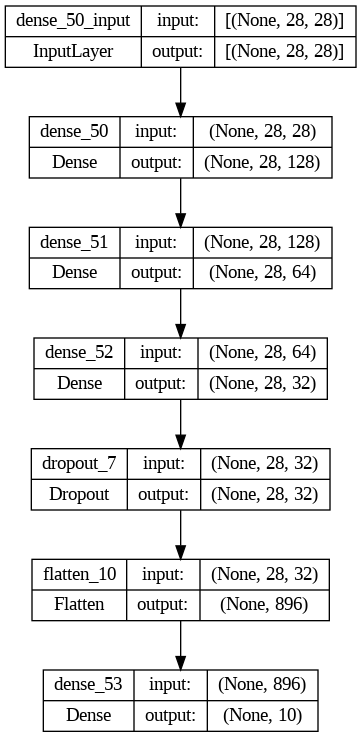

In [ ]:
from keras.utils import plot_model

## 위에서 사용한 모델들 정보 보기
model.summary()
first_model.summary()
second_model.summary()

## 모델 이미지형태로 저장하기
plot_model(model, to_file="MNist_model.png", show_shapes=True, show_layer_names = True)
plot_model(first_model, to_file="Fashion_MNist_model1.png", show_shapes=True, show_layer_names = True)
plot_model(second_model, to_file="Fashion_MNist_model2.png", show_shapes=True, show_layer_names = True)